In [1]:
# Importing libraries
import copy
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import locale

from cycles import calculate_basic_cycle, calculate_two_evaporators_cycle

In [2]:
# Setting locale
locale.setlocale(locale.LC_NUMERIC, "pt_BR")
plt.rcParams['axes.formatter.use_locale'] = True

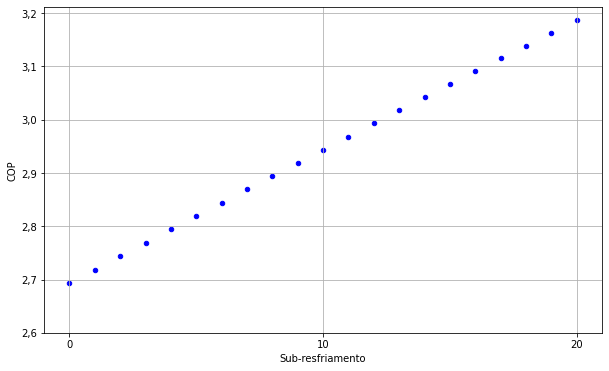

In [3]:
# Usando as variaveis de entrada do Yang (2015).pdf para comparar os ciclos
input_values = {
    't_external_env': 30 + 273.15,
    't_internal_env_ht': -5 + 273.15,
    't_internal_env_lt': -26 + 273.15,
    'approach_condenser': 0,
    'approach_evaporator_ht': 0,
    'approach_evaporator_lt': 0,
    'q_evaporator_ht': 239,
    'q_evaporator_lt': 246,
    'isentropic_efficiency': 0.78,
    'superheating_ht': 0,
    'superheating_lt': 0,
    'refrigerant': 'R600a'
}

input_ranges = {
    'subcooling': range(0,21)
}

original_input_values = copy.copy(input_values)
results = pd.DataFrame(columns=[
    'cop',
    'subcooling'
])
for subcooling in input_ranges['subcooling']:
    input_values = copy.copy(original_input_values)
    input_values['subcooling'] = subcooling
    cycle = calculate_two_evaporators_cycle(input_values)
    results = results.append({
        'cop': cycle['cop'],
        'subcooling': subcooling
    }, ignore_index=True)

fig, ax = plt.subplots(figsize=(10, 6))
results.plot(
    x='subcooling', 
    y='cop', 
    kind='scatter',
    color='blue',
    ax=ax
)
ax.set_ylabel('COP')
ax.set_xlabel('Sub-resfriamento')
ax.set_xticks([0, 10, 20])
ax.set_yticks([2 + (x * 0.1) for x in range(6, 13)])
ax.grid(True)

plt.savefig('images/comparison_with_Yang.png')

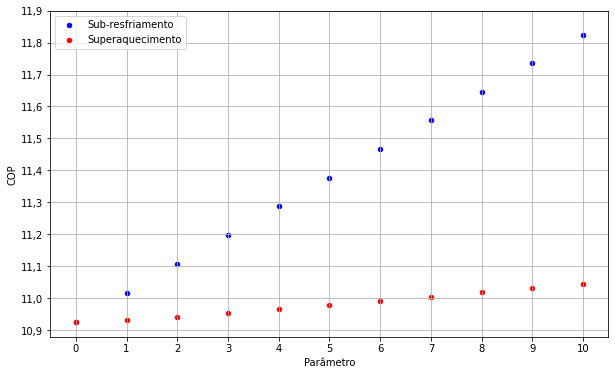

In [4]:
def generate_df_for_comparison_of_parameters_effect_on_cop_basic_cycle(parameter):
    input_values = {
        't_external_env': 28 + 273.15,
        't_internal_env': 21 + 273.15,
        'approach_condenser': 5,
        'approach_evaporator': 5,
        'q_evaporator': 9000 * 0.293071,
        'isentropic_efficiency': 0.7,
        'subcooling': 0,
        'superheating': 0,
        'refrigerant': 'R600a'
    }

    input_ranges = {
        parameter: range(0,11)
    }

    original_input_values = copy.copy(input_values)
    results = pd.DataFrame(columns=[
        'cop',
        parameter
    ])
    for i in input_ranges[parameter]:
        input_values = copy.copy(original_input_values)
        input_values[parameter] = i
        cycle = calculate_basic_cycle(input_values)
        results = results.append({
            'cop': cycle['cop'],
            parameter: i
        }, ignore_index=True)
    return results

results_subcooling = generate_df_for_comparison_of_parameters_effect_on_cop_basic_cycle('subcooling')
results_superheating = generate_df_for_comparison_of_parameters_effect_on_cop_basic_cycle('superheating')

fig, ax = plt.subplots(figsize=(10, 6))
results_subcooling.plot(
    x='subcooling', 
    y='cop', 
    kind='scatter',
    label='Sub-resfriamento',
    color='blue',
    ax=ax
)
results_superheating.plot(
    x='superheating', 
    y='cop', 
    kind='scatter',
    label='Superaquecimento',
    color='red',
    ax=ax
)
ax.set_ylabel('COP')
ax.set_xlabel('Parâmetro')
ax.set_xticks(range(0,11))
ax.set_yticks([10.8 + (x * 0.1) for x in range(1, 12)])
ax.grid(True)

plt.savefig('images/comparison_of_parameters_effect_on_cop_basic_cycle.png')

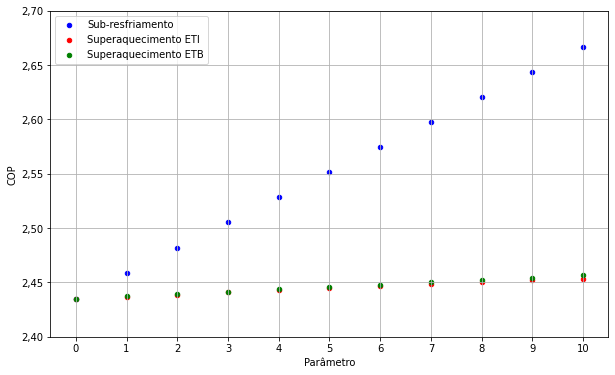

In [5]:
def generate_df_for_comparison_of_parameters_effect_on_cop_two_evaporators_cycle(parameter):
    input_values = {
        't_external_env': 28 + 273.15,
        't_internal_env_ht': 3 + 273.15,
        't_internal_env_lt': -18 + 273.15,
        'approach_condenser': 5,
        'approach_evaporator_ht': 5,
        'approach_evaporator_lt': 5,
        'q_evaporator_ht': 75,
        'q_evaporator_lt': 75,
        'isentropic_efficiency': 0.7,
        'subcooling': 0,
        'superheating_ht': 0,
        'superheating_lt': 0,
        'refrigerant': 'R600a'
    }

    input_ranges = {
        parameter: range(0,11)
    }

    original_input_values = copy.copy(input_values)
    results = pd.DataFrame(columns=[
        'cop',
        parameter
    ])
    for i in input_ranges[parameter]:
        input_values = copy.copy(original_input_values)
        input_values[parameter] = i
        cycle = calculate_two_evaporators_cycle(input_values)
        results = results.append({
            'cop': cycle['cop'],
            parameter: i
        }, ignore_index=True)
    return results

results_subcooling = generate_df_for_comparison_of_parameters_effect_on_cop_two_evaporators_cycle('subcooling')
results_superheating_ht = generate_df_for_comparison_of_parameters_effect_on_cop_two_evaporators_cycle('superheating_ht')
results_superheating_lt = generate_df_for_comparison_of_parameters_effect_on_cop_two_evaporators_cycle('superheating_lt')

fig, ax = plt.subplots(figsize=(10, 6))
results_subcooling.plot(
    x='subcooling', 
    y='cop', 
    kind='scatter',
    label='Sub-resfriamento',
    color='blue',
    ax=ax
)
results_superheating_ht.plot(
    x='superheating_ht', 
    y='cop', 
    kind='scatter',
    label='Superaquecimento ETI',
    color='red',
    ax=ax
)
results_superheating_lt.plot(
    x='superheating_lt', 
    y='cop', 
    kind='scatter',
    label='Superaquecimento ETB',
    color='green',
    ax=ax
)
ax.set_ylabel('COP')
ax.set_xlabel('Parâmetro')
ax.set_xticks(range(0,11))
ax.set_yticks([2 + (x * 0.05) for x in range(8, 15)])
ax.grid(True)

plt.savefig('images/comparison_of_parameters_effect_on_cop_two_evaporators_cycle.png')

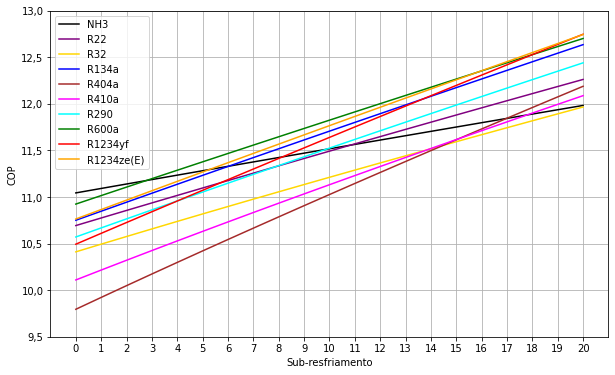

In [6]:
def generate_df_for_comparison_of_subcooling_effect_on_refrigerants_basic_cycle(refrigerant):
    input_values = {
        't_external_env': 28 + 273.15,
        't_internal_env': 21 + 273.15,
        'approach_condenser': 5,
        'approach_evaporator': 5,
        'q_evaporator': 9000 * 0.293071,
        'isentropic_efficiency': 0.7,
        'subcooling': 0,
        'superheating': 0,
        'refrigerant': refrigerant
    }

    input_ranges = {
        'subcooling': range(0,21)
    }

    original_input_values = copy.copy(input_values)
    results = pd.DataFrame(columns=[
        'cop',
        'subcooling'
    ])
    for i in input_ranges['subcooling']:
        input_values = copy.copy(original_input_values)
        input_values['subcooling'] = i
        cycle = calculate_basic_cycle(input_values)
        results = results.append({
            'cop': cycle['cop'],
            'subcooling': i
        }, ignore_index=True)
    return results

dfs = {}
refrigerants = ['NH3', 'R22', 'R32', 'R134a', 'R404a', 'R410a', 'R290', 'R600a', 'R1234yf', 'R1234ze(E)']
refrigerant_colors = {
    'R600a': 'green', 
    'R134a': 'blue',
    'R1234yf': 'red',
    'R1234ze(E)': 'orange', 
    'R22': 'purple', 
    'R290': 'cyan', 
    'NH3': 'black', 
    'R404a': 'brown', 
    'R410a': 'magenta',
    'R32': 'gold'
}
for refrigerant in refrigerants:
    dfs[refrigerant] = generate_df_for_comparison_of_subcooling_effect_on_refrigerants_basic_cycle(refrigerant)
    
fig, ax = plt.subplots(figsize=(10, 6))
for refrigerant in refrigerants:
    dfs[refrigerant].plot(
        x='subcooling', 
        y='cop', 
        kind='line',
        color=refrigerant_colors[refrigerant],
        label=refrigerant,
        ax=ax
)
ax.set_ylabel('COP')
ax.set_xlabel('Sub-resfriamento')
ax.set_xticks(range(0,21))
ax.set_yticks([9 + (x * 0.5) for x in range(1, 9)])
ax.grid(True)

plt.savefig('images/comparison_of_subcooling_effect_on_refrigerants_basic_cycle.png')

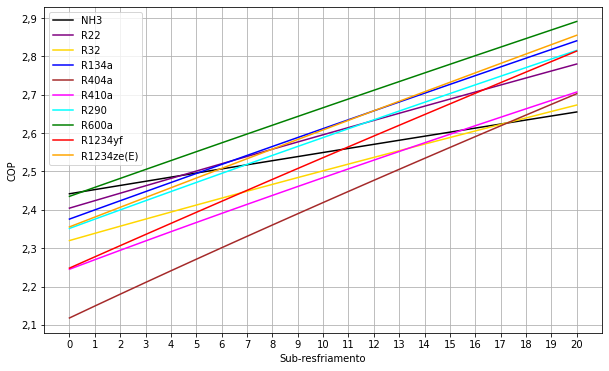

In [7]:
def generate_df_for_comparison_of_subcooling_effect_on_refrigerants_two_evaporators_cycle(refrigerant):
    input_values = {
        't_external_env': 28 + 273.15,
        't_internal_env_ht': 3 + 273.15,
        't_internal_env_lt': -18 + 273.15,
        'approach_condenser': 5,
        'approach_evaporator_ht': 5,
        'approach_evaporator_lt': 5,
        'q_evaporator_ht': 75,
        'q_evaporator_lt': 75,
        'isentropic_efficiency': 0.7,
        'subcooling': 0,
        'superheating_ht': 0,
        'superheating_lt': 0,
        'refrigerant': refrigerant
    }

    input_ranges = {
        'subcooling': range(0,21)
    }

    original_input_values = copy.copy(input_values)
    results = pd.DataFrame(columns=[
        'cop',
        'subcooling'
    ])
    for i in input_ranges['subcooling']:
        input_values = copy.copy(original_input_values)
        input_values['subcooling'] = i
        cycle = calculate_two_evaporators_cycle(input_values)
        results = results.append({
            'cop': cycle['cop'],
            'subcooling': i
        }, ignore_index=True)
    return results

dfs = {}
refrigerants = ['NH3', 'R22', 'R32', 'R134a', 'R404a', 'R410a', 'R290', 'R600a', 'R1234yf', 'R1234ze(E)']
refrigerant_colors = {
    'R600a': 'green', 
    'R134a': 'blue',
    'R1234yf': 'red',
    'R1234ze(E)': 'orange', 
    'R22': 'purple', 
    'R290': 'cyan', 
    'NH3': 'black', 
    'R404a': 'brown', 
    'R410a': 'magenta',
    'R32': 'gold'
}
for refrigerant in refrigerants:
    dfs[refrigerant] = generate_df_for_comparison_of_subcooling_effect_on_refrigerants_two_evaporators_cycle(refrigerant)
    
fig, ax = plt.subplots(figsize=(10, 6))
for refrigerant in refrigerants:
    dfs[refrigerant].plot(
        x='subcooling', 
        y='cop', 
        kind='line',
        color=refrigerant_colors[refrigerant],
        label=refrigerant,
        ax=ax
)
ax.set_ylabel('COP')
ax.set_xlabel('Sub-resfriamento')
ax.set_xticks(range(0,21))
ax.set_yticks([2 + (x * 0.1) for x in range(1, 10)])
ax.grid(True)

plt.savefig('images/comparison_of_subcooling_effect_on_refrigerants_two_evaporators_cycle.png')